In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from datapipeline import DataPipeline
from clusterpipeline import ClusterPipeline
from portfoliopipeline import PortfolioPipeline
from backtestpipeline import BacktestPipeline


# current idea now is cluster --> use johansen test to test for cointegration --> minimise portmanteau stat --> parametric threshold
# or cluster --> engle granger test --> pairs with kalman filter --> parametric threshold

# maybe use daily data to train

data_pipe = DataPipeline([], (2016, 1, 1), (2020, 1, 1), (2022, 1, 1), (2022, 12, 31))
cluster_pipe = ClusterPipeline() 
portfolio_pipe = PortfolioPipeline()
backtest_pipe = BacktestPipeline()


'Is resolution and start and end date as pulled data agreeable?'

'Wanted 0 tickers but got 1193 tickers'

,AAA,AACG,AAME,AAN,AAPB,AAPL,AATC,AAU,ABBNY,ABEO,...,XTNT,XTWY,YELLQ,YOTAR,YPF,YS,YTRA,YVRLF,ZBRA,ZYME
2016-01-04,NaN,1.4590,4.576,80.61,NaN,23.94,2.483,0.6603,13.52,85.50,...,32.5200,NaN,14.00,NaN,15.42,NaN,NaN,11.1200,66.49,NaN
2016-01-05,NaN,1.4960,4.321,82.17,NaN,23.34,2.440,0.6500,13.28,87.50,...,33.0000,NaN,14.23,NaN,15.35,NaN,NaN,11.1200,64.82,NaN
2016-01-06,NaN,1.6470,4.444,75.95,NaN,22.88,2.396,0.6300,13.06,80.75,...,33.4800,NaN,13.41,NaN,14.62,NaN,NaN,11.0000,62.23,NaN
2016-01-07,NaN,1.4550,4.330,73.46,NaN,21.92,2.191,0.6430,12.81,73.25,...,32.6400,NaN,12.45,NaN,14.39,NaN,NaN,11.3200,59.41,NaN
2016-01-08,NaN,1.3520,4.217,72.26,NaN,22.03,2.150,0.6201,12.59,73.00,...,33.6000,NaN,12.19,NaN,14.30,NaN,NaN,10.4000,59.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,22.75,1.4400,2.370,10.75,15.87,130.94,3.195,0.2450,29.12,2.51,...,0.6563,44.87,2.66,0.110000,9.09,10.020,2.39,0.8352,248.22,8.04
2022-12-27,22.74,1.3600,2.345,10.73,15.51,129.12,3.245,0.2403,29.45,2.41,...,0.6570,43.89,2.56,0.095200,8.84,10.020,2.37,0.7600,251.00,7.49
2022-12-28,22.76,1.3069,2.282,10.71,14.64,125.16,3.169,0.2355,29.09,2.40,...,0.6300,43.89,2.46,0.091500,9.09,10.020,2.50,0.7400,246.84,7.49
2022-12-29,22.79,1.3500,2.135,11.16,15.39,128.71,3.052,0.2400,29.68,2.82,...,0.6600,44.11,2.61,0.090224,9.05,10.030,2.44,0.7576,257.53,7.81


In [5]:
training_df, validation_df, testing_df, training_and_validation_df = data_pipe.preprocess_and_split_data()

'##### Filtering #####'

'##### Coordinating #####'

(1006, 595)

'595 to 487 columns - 108 NA columns dropped'

"Dropped ['AGNCN', 'AIO', 'APRN', 'APTX', 'AQNA', 'AQNB', 'ASAP', 'ASPU', 'ATMP', 'ATNXQ', 'AXNX', 'AZREF', 'BAK', 'BBCA', 'BBU', 'BBUS', 'BCI', 'BCML', 'BCYC', 'BILI', 'BITI', 'BOXL', 'BRY', 'BSGM', 'BSJO', 'CANF', 'CCIF', 'CDLX', 'CEPU', 'CGBD', 'CGC', 'CSML', 'CWEN.A', 'CYCN', 'DAC', 'DALI', 'DALT', 'DAVA', 'DBX', 'DZSI', 'EEMO', 'FFHG', 'FIVG', 'FLBR', 'FLCO', 'FLQL', 'FPH', 'FREQ', 'FTS', 'FTV', 'HBB', 'HONE', 'HOOK', 'IBML', 'ICHR', 'ICLK', 'IFMK', 'IGEB', 'IHF', 'IHIT', 'IHRT', 'IRBO', 'IUS', 'JBGS', 'JMIA', 'JMST', 'JPT', 'KURE', 'LGF.B', 'LHC', 'LIN', 'LMPX', 'LOMA', 'LOVLY', 'LX', 'MDB', 'MEDP', 'METC', 'MEXX', 'MFEM', 'MFUS', 'MGTX', 'MGY', 'MHLA', 'MILN', 'MIRM', 'MIST', 'MNSB', 'MOR', 'MORE', 'MPV', 'MRAM', 'MRBK', 'MRKR', 'MVST', 'MYO', 'NHIQ', 'NMTRQ', 'NOCT', 'NOVNQ', 'NUSC', 'PACK', 'PAGS', 'PARAA', 'PAUG', 'PAVE', 'PDLB', 'PGEN', 'PUTW', 'PWS', 'RDIV', 'RWK', 'RWL', 'RYTM', 'SACC', 'SAFE', 'SBT', 'SNSR', 'SONO', 'SPAQ', 'SUPV', 'SY', 'TAIL', 'TBC', 'TRVG', 'TSL', 'TXG

'Df new start date 2016-10-14, removed first 198 or 19.68% rows'

'0 original tickers to 487 tickers'

'808 + 505 + 251'

'##### Finding clusters now #####'

'487 to 487 columns - 0 NA columns dropped'

'Dropped [] columns'

'487 to 487 columns - 0 NA columns dropped'

'Dropped [] columns'

'29.856680123208587% of variance - 15 components'

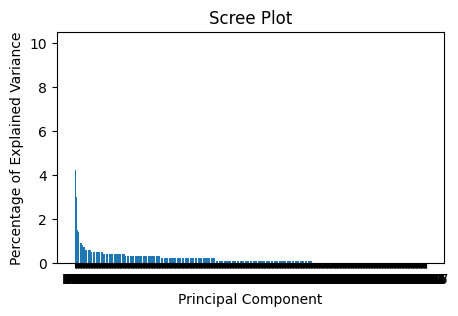

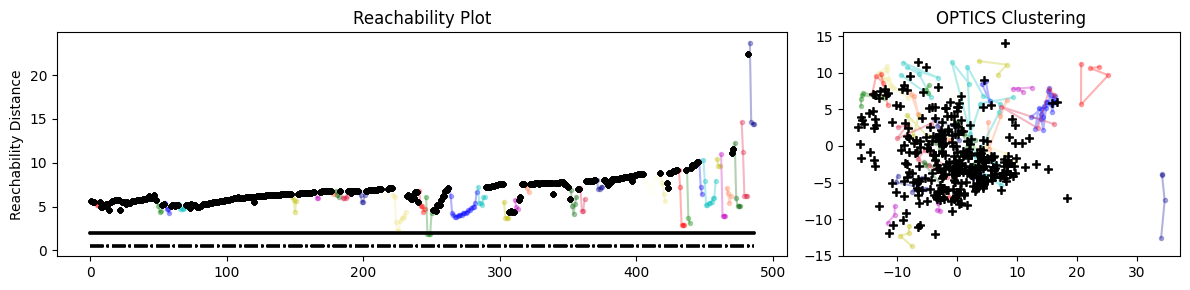

In [6]:
display('##### Finding clusters now #####')
clusters = [training_df.columns] if training_df.shape[1] < 15 else cluster_pipe.find_clusters(training_df)

In [9]:
for cluster in clusters:
  display(cluster)

['GFF', 'KELYA', 'KFRC']

['BLFS', 'IMMR', 'LCTX', 'VRAYQ']

['CALA', 'CRIS', 'MGNX', 'MRTX']

['ASAP', 'KTCC', 'LIVE', 'NC', 'NHIQ']

['LRCX', 'MKSI', 'TXN', 'WDC']

['AGM', 'FRBK', 'WHG']

['BAH', 'MSI', 'PLNT']

['CMCSA', 'IPG', 'PARA']

['ALGT', 'CCL', 'DAL', 'SAVE', 'UAL']

['ATHM', 'CAF', 'MLCO', 'MOMO', 'WB']

['FTV', 'GGG', 'MMM', 'ROP']

['EZU', 'GF', 'IEFA', 'IEUR', 'IVLU', 'MOTI', 'SCHC', 'VEA', 'VSS', 'VYMI']

['ICVT', 'IXN', 'IYW', 'MGK', 'ONEQ']

['CSM', 'IYY', 'MGC', 'PUTW', 'SCHX']

['CEV',
 'CXH',
 'DTF',
 'IQI',
 'KSM',
 'MFM',
 'MHD',
 'MHF',
 'MHI',
 'MHN',
 'MIY',
 'MNP',
 'MPA',
 'MQY',
 'MVT',
 'MYN',
 'NAN',
 'NAZ',
 'NBH',
 'NCA',
 'NUW']

['AIA', 'EEMO', 'EMF', 'FNDE', 'IDX', 'VWO']

['BHLB', 'CTBI', 'HOMB', 'SYBT']

['CFG', 'MTB', 'WFC']

['ACN', 'PAYX', 'SPGI']

['APA', 'CHK', 'HAL', 'MTDR', 'RRC']

['BP', 'ERX', 'FILL', 'IGE']

['BCS', 'BSIG', 'DB', 'IVZ', 'MFC']

['AKO.B', 'BCH', 'BRZU', 'CEW', 'CX', 'EWW', 'FBZ', 'MXF', 'PAC', 'TX', 'VLRS']

['CORN', 'DBA', 'SUPV', 'WEAT']

['AGG', 'AGGY', 'BIV', 'CMBS', 'VCIT']

['ANGL', 'BSJN', 'BSJO']

['CL', 'MKC', 'PG']

['EXR', 'FRT', 'GNL', 'IYR', 'MPW', 'NHI', 'NSA', 'OLP', 'RWO', 'RWR']

['DEO', 'FTS', 'SBAC']

['D', 'NI', 'PEG', 'SO']

['ALE', 'IDA', 'MGEE', 'SWX']

['ARR', 'MFA', 'MORT', 'PMT', 'RWT']

['CEF', 'GDX', 'MUX', 'PPLT', 'SA']

['DOG', 'FAZ', 'RWM', 'TWM']

In [7]:
# get pairs for validation test
validation_pairs = portfolio_pipe.find_pairs_from_clusters(training_df, clusters)
# if validation_pairs is None or validation_pairs.shape[0] == 0:
# 	display(f'No validated pairs')
# 	return

initial_capital = 5000

# validation backtest
validation_backtest_results = backtest_pipe.validation_backtest(training_df, validation_df, validation_pairs, initial_capital=initial_capital)

for pair_key in validation_backtest_results:
	backtest_pipe.plot_pair_backtest(validation_backtest_results, pair_key)



# filter results
filtered_validation_backtest_results = {}

for pair_key in validation_backtest_results:
	margin = validation_backtest_results[pair_key]['margin']
	if (margin[-1]-margin[0])/margin[0] >= 0.1:
		filtered_validation_backtest_results[pair_key] = validation_backtest_results[pair_key]

num_successful = len(filtered_validation_backtest_results)
num_total = len(validation_backtest_results)
display(f'{num_successful}/{num_total} = {num_successful/num_total*100:.2f}% have +PnL')
display(filtered_validation_backtest_results)

'Testing 3 pairs in cluster 0'

AttributeError: 'PortfolioPipeline' object has no attribute 'engle_granger_two_step_cointegration_test'

In [ ]:

# # if len(filtered_validation_pairs) == 0:
# # 	display(f'No positive validated pairs')
# # 	return


# # get final test pairs
# test_pairs = portfolio_pipe.revalidate_pairs(filtered_validation_backtest_results)



# # test backtest
# test_backtest_results = backtest_pipe.test_backtest(training_and_validation_df, testing_df, test_pairs, filtered_validation_backtest_results, initial_capital=initial_capital)
# for pair_key in test_backtest_results:
# 	backtest_pipe.plot_pair_backtest(test_backtest_results, pair_key)


# display(test_pairs)
# display(f'Total pairs validated / total pairs found = {num_successful}/{num_total} = {num_successful/num_total*100:.2f}% pairs ')